In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
# Load the dataset (MNIST in this example)
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Flatten the images (MNIST images are 28x28)
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

In [4]:
# Define the autoencoder model
input_layer = Input(shape=(28 * 28,))
encoded = Dense(128, activation='relu')(input_layer)  # Encoding layer
decoded = Dense(28 * 28, activation='sigmoid')(encoded)  # Decoding layer
autoencoder = Model(input_layer, decoded)

In [5]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 12ms/step - loss: 0.2130 - val_loss: 0.1335
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1170 - val_loss: 0.1023
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0962 - val_loss: 0.0890
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0859 - val_loss: 0.0817
Epoch 5/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0799 - val_loss: 0.0770
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0762 - val_loss: 0.0742
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0738 - val_loss: 0.0723
Epoch 8/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0722 - val_loss: 0.0709
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0701 - val_loss: 0.069

In [7]:
# Evaluate the autoencoder (you can use a different dataset for evaluation if available)
loss = autoencoder.evaluate(x_test, x_test)
print("Test loss:", loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.0693
Test loss: 0.06933794915676117


In [8]:
# Use the autoencoder to encode and decode data
encoded_images = autoencoder.predict(x_test)

313/313 [==============================] - 1s 1ms/step


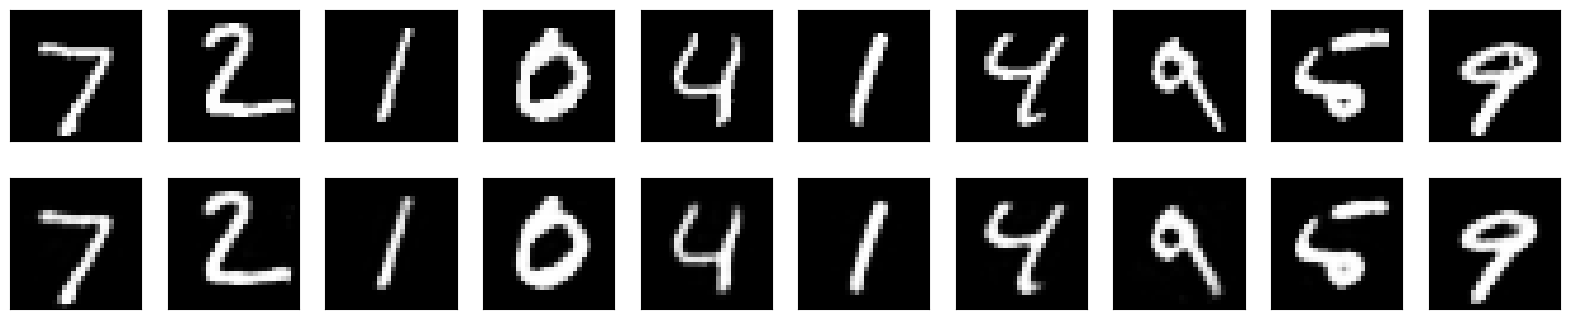

In [9]:
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()